<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

## Assignment Objective
The aim of this assignment is to guide you through the process of understanding a dataset,
performing preprocessing, building classification models, including ensemble learning techniques,
and evaluation using cross-validation and various metrics.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from apyori import apriori
import math 
#settings for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

## Data Exploration


In [2]:
df = pd.read_csv('Student_dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17.0,5,171.0,1,1,122.0,1,19.0,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15.0,1,9254.0,1,1,160.0,1,1.0,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1.0,5,9070.0,1,1,122.0,1,37.0,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17.0,2,9773.0,1,1,122.0,1,38.0,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39.0,1,8014.0,0,1,100.0,1,37.0,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## List of datatypes, duplicates and Null-values 

In [3]:
#understanding rows and attribute types
print('No. of records and attributes: ',df.shape)
print('List of attributes: ',df.columns)
display(df.info())

No. of records and attributes:  (4446, 37)
List of attributes:  Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Cu

None

### List of data contained Null-values

In [4]:
df2 = df
df2.isna().sum()

Marital status                                     0
Application mode                                   2
Application order                                  0
Course                                             6
Daytime/evening attendance\t                       0
Previous qualification                             0
Previous qualification (grade)                     7
Nacionality                                        0
Mother's qualification                             3
Father's qualification                             0
Mother's occupation                                0
Father's occupation                                0
Admission grade                                   18
Displaced                                          3
Educational special needs                          0
Debtor                                             2
Tuition fees up to date                            0
Gender                                             0
Scholarship holder                            

#### From the above we can observe the list of attributes that contain NaN values: 
* Application mode
* Course
* Previous qualification (grade)
* Mother's qualification
* Admission grade
* Displaced
* Debtor
* Scholarship holder 
* Age at enrollment

In [5]:
# Check for duplicate rows
duplicates = df2.duplicated().sum()

# Display rows that are duplicates
print(f"Numbers of duplicated Rows: {duplicates}")

Numbers of duplicated Rows: 22


In [6]:
after_duplicates = df2.drop_duplicates()
print(f"Numbers of duplicates after drop {after_duplicates.shape}")

Numbers of duplicates after drop (4424, 37)


### Numerical Attributes with Null-values

In [7]:
# Select numerical columns
numerical_columns = df2.select_dtypes(['int64', 'float64'])

# Find numerical columns with null values
numerical_with_nulls = numerical_columns.columns[numerical_columns.isna().any()]

# Display only numerical columns with null values
print("Numerical columns with null values:")
print(numerical_with_nulls)

Numerical columns with null values:
Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Mother's qualification', 'Admission grade', 'Displaced', 'Debtor',
       'Scholarship holder', 'Age at enrollment'],
      dtype='object')


#### Numerical attributes description/normalization

In [8]:
# Describe only the numerical columns with null values
described_null_attributes = numerical_columns[numerical_with_nulls].describe()

# Display the description
print("Description of numerical attributes with null values:")
described_null_attributes

Description of numerical attributes with null values:


,Application mode,Course,Previous qualification (grade),Mother's qualification,Admission grade,Displaced,Debtor,Scholarship holder,Age at enrollment
count,4444.000000,4440.000000,4439.000000,4443.000000,4428.000000,4443.000000,4444.000000,4444.000000,4442.000000
mean,18.663816,8858.807432,132.640572,19.552104,126.986066,0.548728,0.113636,0.248650,23.268798
std,17.490937,2060.398841,13.221879,15.610384,14.480251,0.497676,0.317405,0.432279,7.595064
min,1.000000,33.000000,95.000000,1.000000,95.000000,0.000000,0.000000,0.000000,17.000000
25%,1.000000,9085.000000,125.000000,2.000000,117.900000,0.000000,0.000000,0.000000,19.000000
50%,17.000000,9238.000000,133.100000,19.000000,126.100000,1.000000,0.000000,0.000000,20.000000
75%,39.000000,9556.000000,140.000000,37.000000,134.800000,1.000000,0.000000,0.000000,25.000000
max,57.000000,9991.000000,190.000000,44.000000,190.000000,1.000000,1.000000,1.000000,70.000000


#### Fill in Null-values with means (numerical attributes)

In [9]:
# List of numerical attributes with null values
numerical_with_nulls = [
    'Application mode', 
    'Course', 
    'Previous qualification (grade)',
    "Mother's qualification", 
    'Admission grade', 
    'Displaced', 
    'Debtor', 
    'Scholarship holder', 
    'Age at enrollment'
]

# Replace null values with the mean for the specified columns
for col in numerical_with_nulls:
    if col in df2.columns:  # Ensure the column exists in the DataFrame
         df2[col] = df2[col].fillna(df2[col].mean())

# Verify that null values are replaced
print("Null values after replacement:")
print(df2.isna().sum())  # Should show 0 for all columns


Null values after replacement:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder               

In [10]:
# Initialize categories
continuous_features = []
ordinal_features = []
ratio_features = []
binary_features = []

# Categorize features
for col in df2.columns:
    unique_vals = df2[col].nunique()
    if df2[col].dtype in ['int64', 'float64']:
        if unique_vals == 2:
            binary_features.append(col)  # Binary (Yes/No, Male/Female)
        elif unique_vals > 10:
            if col.lower().endswith(('grade', 'percentage', 'score')):
                continuous_features.append(col)  # Likely Continuous
            else:
                ratio_features.append(col)  # Likely Ratio
        else:
            ordinal_features.append(col)  # Small range, likely Ordinal
    elif df2[col].dtype == 'object':
        if unique_vals == 2:
            binary_features.append(col)  # Binary categorical
        else:
            ordinal_features.append(col)  # Ordinal categorical

# Print categorized features
print(f"\nContinuous Features:", continuous_features)
print(f"\nOrdinal Features:", ordinal_features)
print(f"\nRatio Features:", ratio_features)
print(f"\nBinary Features:", binary_features)


Continuous Features: ['Admission grade']

Ordinal Features: ['Marital status', 'Application order', 'Displaced', 'Debtor', 'Scholarship holder', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

Ratio Features: ['Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

Binary Features: ['Daytime/evening attendance\t', 'Educational sp

C:\Users\Aliff\AppData\Local\Temp\ipykernel_18072\1528727100.py:36: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Aliff\anaconda3\envs\CDS6314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


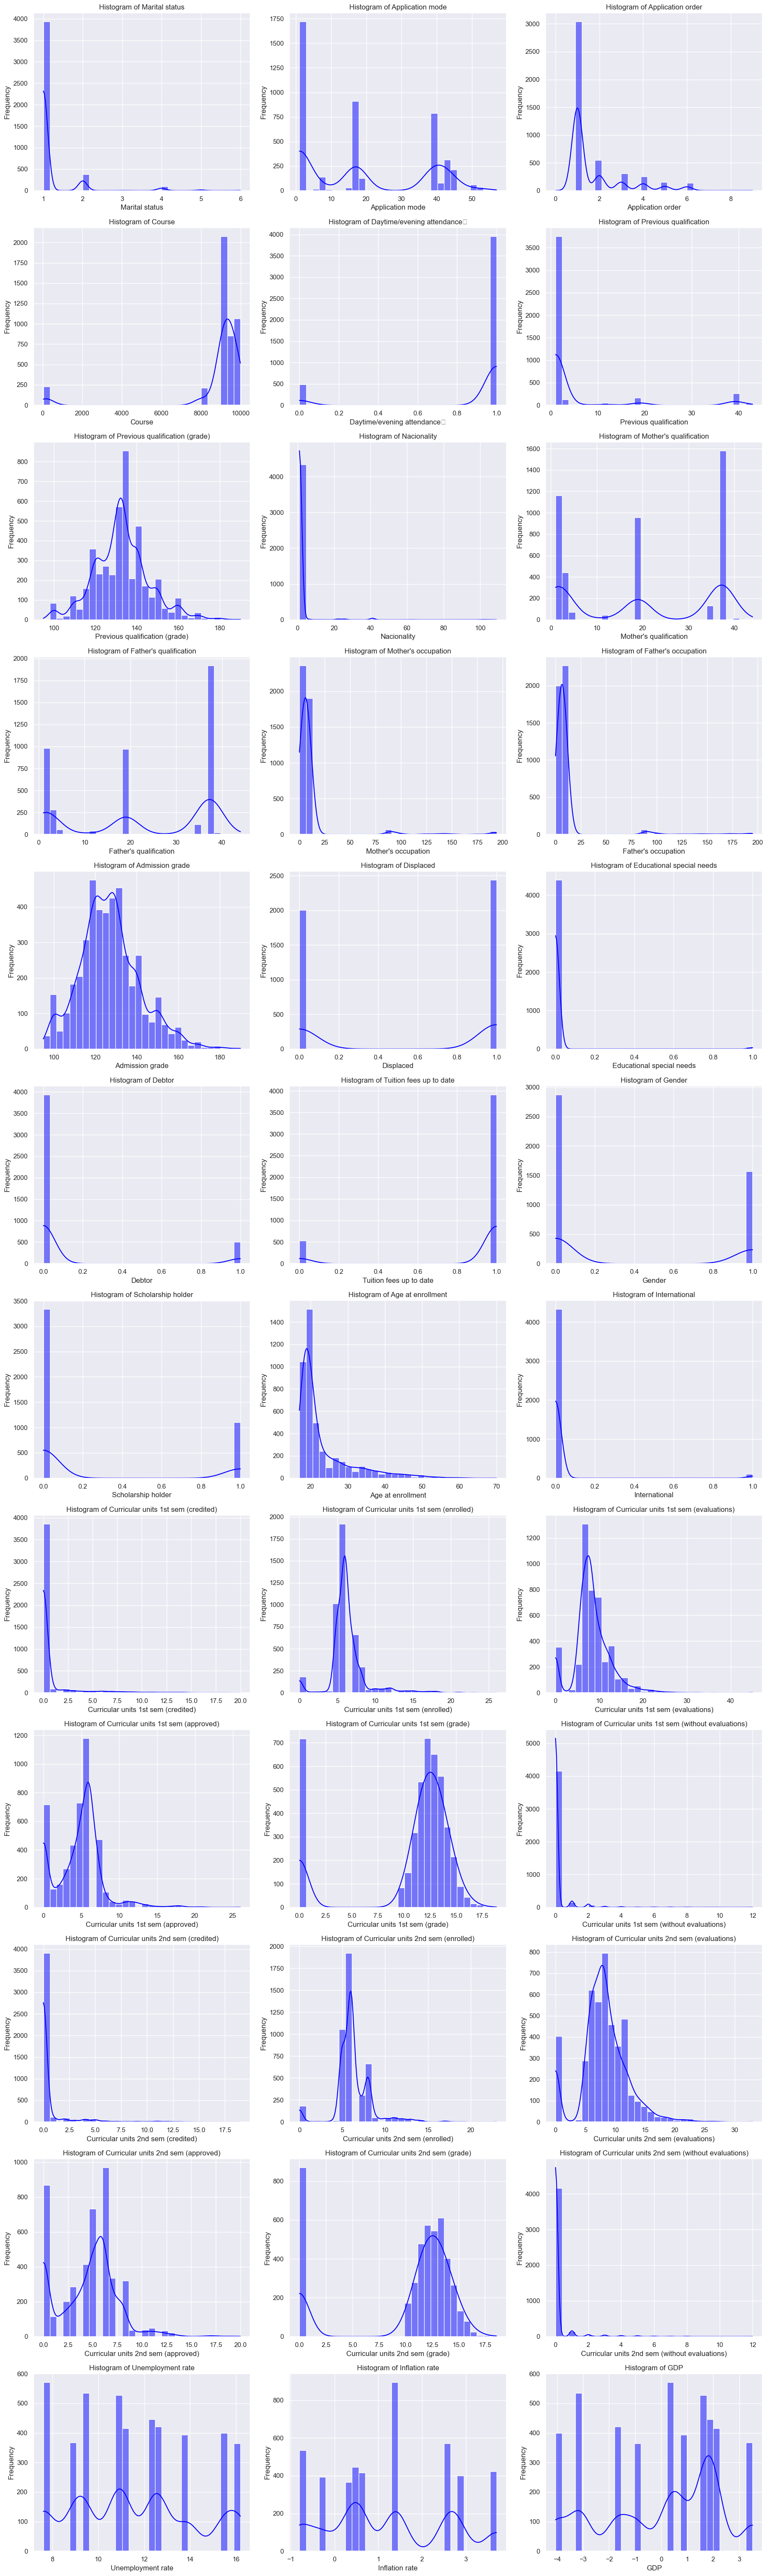

In [11]:
# Combine both for a single visualization layout
all_columns = list(numerical_columns)

# Define the layout
columns_per_row = 3  # Number of plots per row
num_columns = len(all_columns)
num_rows = math.ceil(num_columns / columns_per_row)
# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each attribute
for idx, column in enumerate(all_columns):
    ax = axes[idx]
    
    if column in numerical_columns:
        # Plot histograms with KDE for numerical columns
        sns.histplot(df2[column], kde=True, ax=ax, bins=30, color='blue')
        ax.set_title(f"Histogram of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Frequency")
    elif column in categorical_columns:
        # Plot count plots for categorical columns
        sns.countplot(x=df2[column], ax=ax, palette="viridis", hue=None)
        ax.set_title(f"Count of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        # Rotate labels for better visibility
        ax.tick_params(axis='x', rotation=45)

# Hide unused subplots
for idx in range(num_columns, len(axes)):
    axes[idx].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Aliff\AppData\Local\Temp\ipykernel_18072\143957132.py:18: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Aliff\anaconda3\envs\CDS6314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


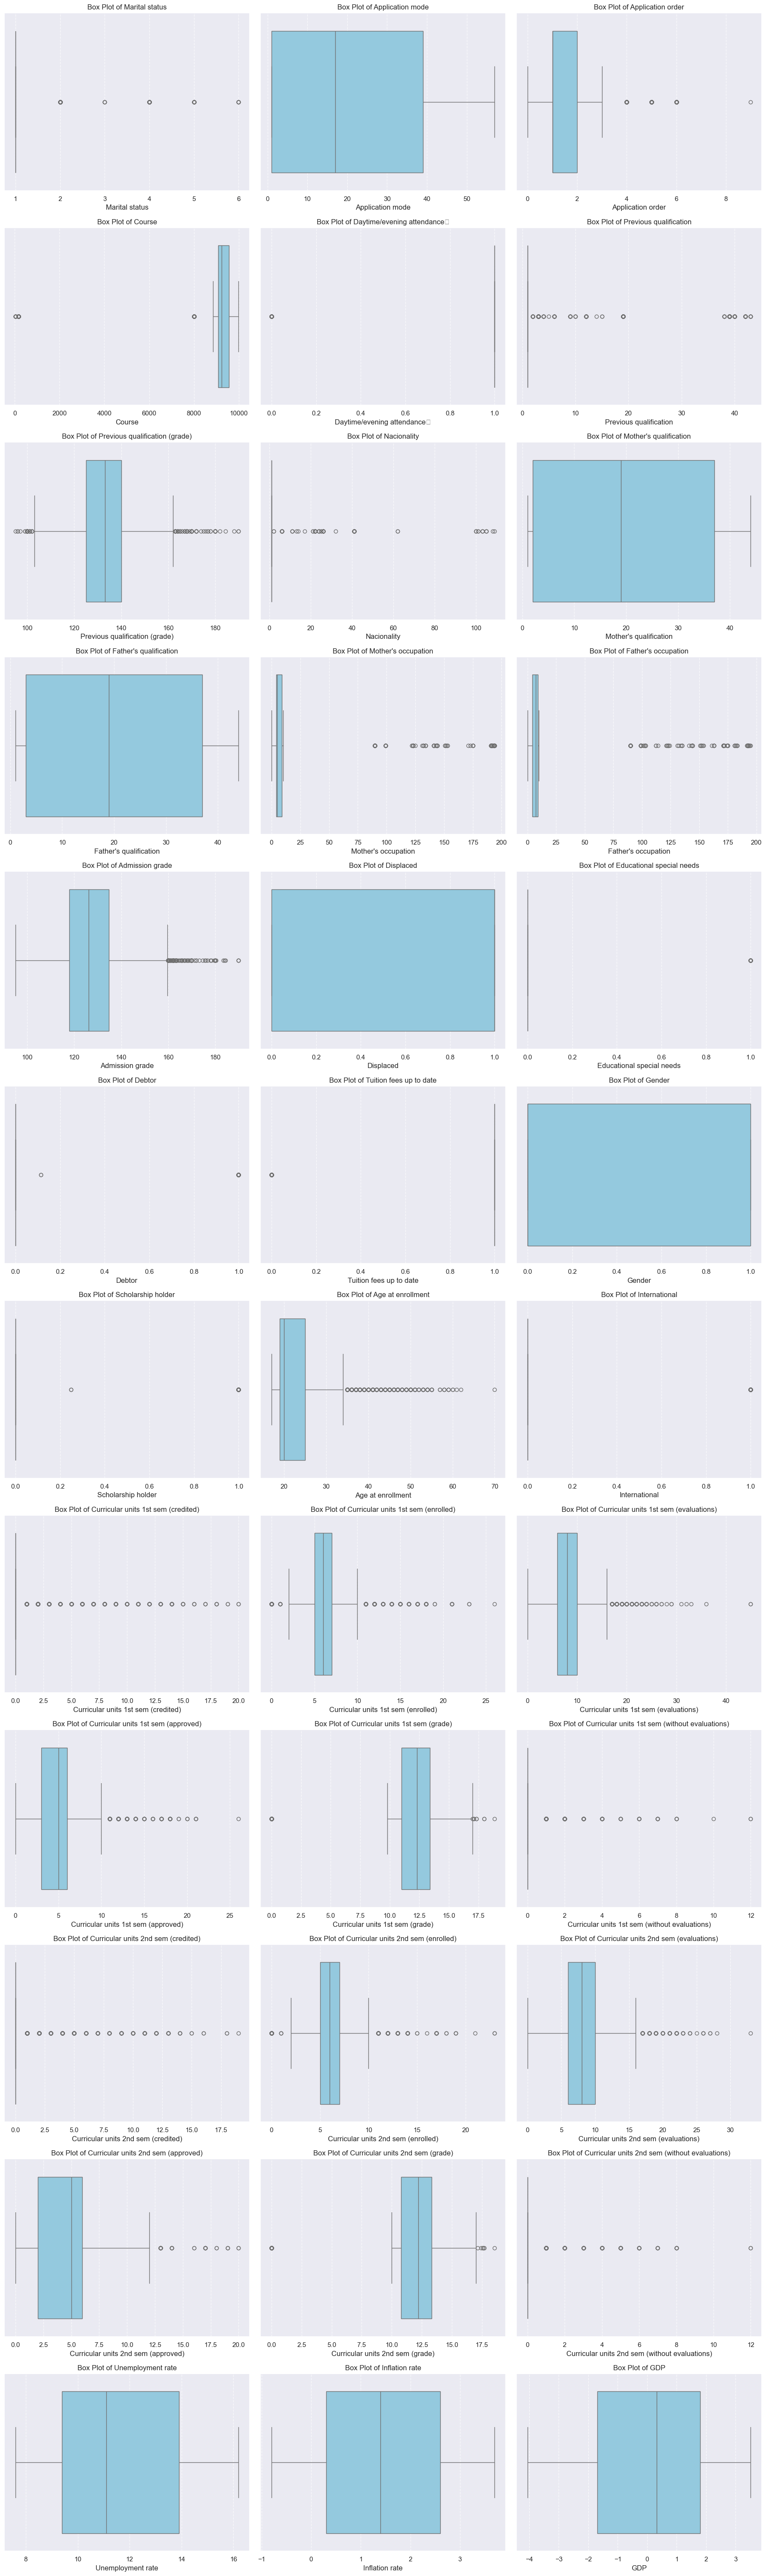

In [12]:
# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot boxplots for numerical columns
for idx, column in enumerate(numerical_columns):
    ax = axes[idx]  # Select the appropriate subplot
    sns.boxplot(x=df2[column], ax=ax, color='skyblue')  # Boxplot for each numerical column
    ax.set_title(f"Box Plot of {column}")
    ax.set_xlabel(column)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Hide unused subplots
for idx in range(num_columns, len(axes)):
    axes[idx].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

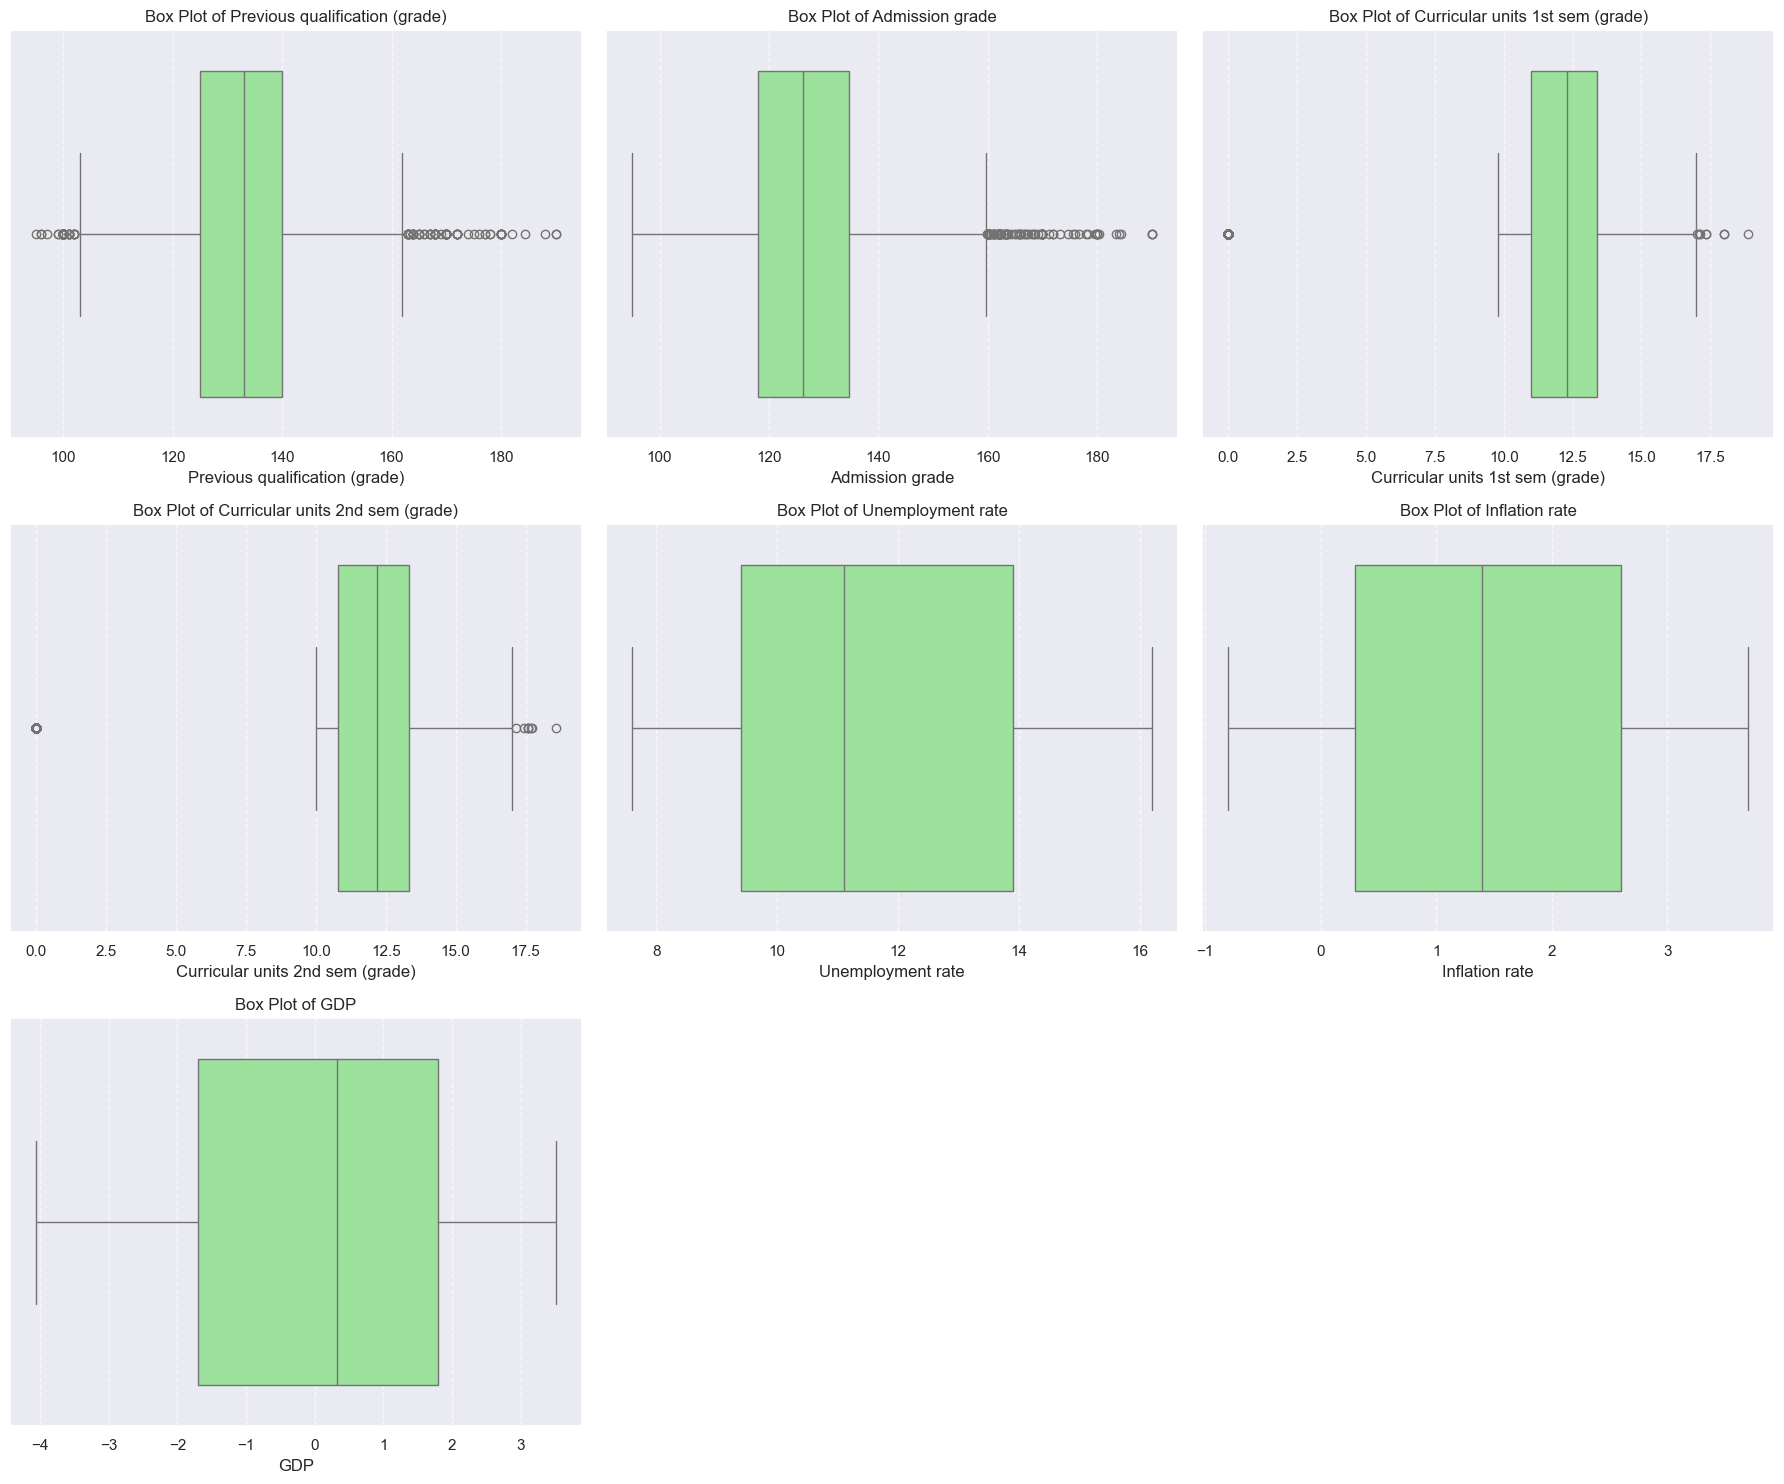

In [14]:
# Define continuous features (manually or dynamically)
# Example: Replace 'feature1', 'feature2', etc., with actual column names
continuous_features = [ 'Previous qualification (grade)',
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP']  # Replace this with your continuous feature names

# Check if the continuous features exist in the dataset
continuous_features = [col for col in continuous_features if col in df2.columns]

# Define the layout
columns_per_row = 3  # Number of plots per row
num_features = len(continuous_features)
num_rows = math.ceil(num_features / columns_per_row)

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot boxplots for continuous features
for idx, column in enumerate(continuous_features):
    ax = axes[idx]  # Select the appropriate subplot
    sns.boxplot(x=df2[column], ax=ax, color='lightgreen')  # Boxplot for each continuous feature
    ax.set_title(f"Box Plot of {column}")
    ax.set_xlabel(column)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Hide unused subplots
for idx in range(num_features, len(axes)):
    axes[idx].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

#### Categorial description 

In [ ]:
#exploring categotical data
categorical_columns = df2.select_dtypes(['object']).describe()
categorical_columns

In [ ]:
plt.figure()
sns.countplot(  data=df2, x='Target', hue='Target', palette='viridis', dodge=False, )
plt.title('Class Distribution for Training Set')
plt.show()

---
# Data Preprocessing

#### Collerration analysis

In [ ]:
corr_threshold = 0.5
filtered_corr = corr[(corr > corr_threshold) | (corr < -corr_threshold)]

plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(filtered_corr, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", mask=filtered_corr.isnull())
plt.title("Filtered Correlation Heatmap")
plt.show()

In [ ]:
# Flatten the correlation matrix and sort
corr_flat = corr.unstack().reset_index()
corr_flat.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
corr_flat['AbsCorrelation'] = corr_flat['Correlation'].abs()

# Remove duplicates (e.g., "Attribute A - Attribute B" and "Attribute B - Attribute A")
corr_flat = corr_flat[corr_flat['Attribute 1'] != corr_flat['Attribute 2']]  # Remove self-correlations
top_10_corr = corr_flat.sort_values(by='AbsCorrelation', ascending=False).head(20)
corr_flat = corr_flat.drop_duplicates(subset=['AbsCorrelation'])

# Sort by absolute correlation and select the top 10
top_10_unique_corr = corr_flat.sort_values(by='AbsCorrelation', ascending=False).head(10)

# Display the top 10 correlations
print("Top 10 Highest Correlations:")
top_10_unique_corr[['Attribute 1', 'Attribute 2', 'Correlation']]


In [ ]:
# Plot the Top 10 Correlations
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_unique_corr['Correlation'], 
    y=top_10_unique_corr.apply(lambda x: f"{x['Attribute 1']} - {x['Attribute 2']}", axis=1),
    palette="viridis", hue =top_10_unique_corr.apply(lambda x: f"{x['Attribute 1']} - {x['Attribute 2']}", axis=1)
)
plt.title("Top 10 Highest Correlations Between Attributes")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attribute Pairs")
plt.tight_layout()
plt.show()

## HeatMap Collerration

In [ ]:
# Create a pivot table for the heatmap
heatmap_data = top_10_corr.pivot(index = "Attribute 1", columns="Attribute 2",values = "Correlation")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Top 10 Highest Correlations")
plt.tight_layout()
plt.show()


### Curricular units 1st sem (credited)	Curricular units 2nd sem (credited)

In [ ]:
from scipy.stats import pearsonr

# Create scatter plots for the top 5 correlations with linear fit and linearity check
num_plots = len(top_10_corr)  # Number of correlations to plot
rows = (num_plots + 1) // 2  # Calculate rows needed for 2 columns

plt.figure(figsize=(15, rows * 5))  # Dynamically adjust the figure size

for i, row in enumerate(top_10_corr.itertuples(), 1):
    feature1 = row._1  # Feature 1
    feature2 = row._2  # Feature 2

    # Compute Pearson correlation coefficient
    correlation, _ = pearsonr(df2[feature1], df2[feature2])
    linearity = "Linear" if abs(correlation) > 0.7 else "Non-linear"

    # Create a subplot
    plt.subplot(rows, 2, i)
    sns.regplot(x=df2[feature1], y=df2[feature2], line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
    plt.title(f'{feature1} vs {feature2}\nCorrelation: {correlation:.2f} ({linearity})')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.suptitle('Scatter Plots with Linear Fit for Top 10 Correlations', y=1.02, fontsize=16)
plt.show()

In [ ]:
sns.regplot(x='Curricular units 1st sem (credited)', y='Curricular units 2nd sem (credited)', data=df2)
plt.title("Linear Fit: Curricular Units")
plt.show()


In [ ]:
corr = df2[['Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)']].corr()
corr

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit a simple linear regression
X = df2[['Curricular units 1st sem (credited)']].dropna()  # Example feature
y = df2['Curricular units 2nd sem (credited)'].dropna()
model = LinearRegression()
model.fit(X, y)

# Residual plot
predictions = model.predict(X)
residuals = y - predictions

sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### Spliting data
* to avoid data leakage before balencing


In [ ]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'data' is already loaded and contains the 'Target' column
X = df2.drop('Target', axis=1)
y = df2['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create a balanced dataset
balanced_data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.DataFrame(y_balanced, columns=['Target'])], axis=1)

# Save balanced data to a CSV file
balanced_output_path = 'Student_dataset_balanced.csv'
balanced_data.to_csv(balanced_output_path, index=False)
print(f"Balanced data saved to {balanced_output_path}")

In [ ]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='Target', data = pd.DataFrame({'Target':y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='Target', data = pd.DataFrame({'Target':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()

Right after we finish splitting, we can proceed to balance the training set using SMOTE.

For the current dataset, we have both numerical and categorical attributes. Therefore, we need to use SMOTENC, which requires the numerical data to be normalized, and also need to explicitly specify the index of the categorical columns. The following code extracts the indices of categorical columns and then normalizes the numerical values:

In [ ]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


In [ ]:
plt.figure()
sns.countplot(
    data=balanced_data, 
    x='Target', 
    hue='Target',  # Assign 'Target' to hue to match the palette
    palette='viridis',
    dodge=False,  # Ensures bars are not separated
    legend=False  # Removes the legend since it's redundant
)
plt.title('Class Distribution After Balancing', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The average accurary of the model should be quite high. Now let's evaluate the model with the test data. Our set of test data was not normalized yet, so lets do that first then get the average accuracy using the `score` function:

In [ ]:
# Convert X_train back to a DataFrame
X_train_preprocess = pd.DataFrame(X, columns=X.columns)

# Normalize numerical attributes using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
num_attributes = X_train_preprocess.select_dtypes(['int64', 'float64']).columns  # Identify numerical columns
X_train_preprocess[num_attributes] = min_max_scaler.fit_transform(X_train_preprocess[num_attributes])

# Display the preprocessed DataFrame
X_train_preprocess.head()


---
# Classification

Up until this point we current have a balanced training dataset, and a testing set for evaluation. In this section, we will train various classifiers, evaluate and compare the results. Most traditional classifiers are available in the scikit-learn package, but there are also alternatives available from other packages like Statsmodel, etc. Depending on the type of classifiers selected, additionally preprocessing might be needed to convert the attributes into the required type.

### Logistic Rigression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Check performance on the training set
print('Training accuracy: ', logreg.score(X_train_scaled, y_train))


### Testing Accurancy

In [ ]:
print('Testing accuracy: ', logreg.score(X_test_scaled, y_test) )

### Confussion Matrix

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict the labels for the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Check if it's binary classification (2x2 matrix)
if conf_mat.shape == (2, 2):
    tn, fp, fn, tp = conf_mat.ravel()
    print('True positive: ', tp)
    print('True negatives: ', tn)
    print('False positive: ', fp)
    print('False negatives: ', fn)
else:
    # Multi-class classification
    print("Multi-class confusion matrix, cannot unpack directly.")
    for i in range(conf_mat.shape[0]):
        print(f"Metrics for Class {i}:")
        tp = conf_mat[i, i]
        fn = conf_mat[i, :].sum() - tp
        fp = conf_mat[:, i].sum() - tp
        tn = conf_mat.sum() - (tp + fn + fp)
        print(f"  True Positives: {tp}")
        print(f"  True Negatives: {tn}")
        print(f"  False Positives: {fp}")
        print(f"  False Negatives: {fn}")


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multiclass ROC
classes = logreg.classes_
y_test_binarized = label_binarize(y_test, classes=classes)
y_proba = logreg.predict_proba(X_test_scaled)  # Get prediction probabilities

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="best")
plt.show()


---
## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

In [ ]:
#Testing time may take long
print('Training accuracy: ', knn.score(X_train_scaled,y_train))
print('Testing accuracy: ', knn.score(X_test_scaled, y_test))

In [ ]:
knn_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, knn_pred))

In [ ]:
knn_conf_mat = confusion_matrix(y_test, knn_pred,normalize='true')
sns.heatmap(knn_conf_mat, annot=True)
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for K
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# GridSearchCV to find the best K
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the best model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("\nClassification Report for Best KNN:")
classification_report(y_test, y_pred_best)


## Support Vector Machines (SVM)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42,)
svm_model.fit(X_train_scaled, y_train)
# Encode labels again if needed
label_encoder = LabelEncoder()
y_pca = label_encoder.fit_transform(y_train)
# Encode labels again if needed

In [ ]:

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

# Step 1: Reduce the dataset to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Step 2: Use the encoded labels (numerical) for plotting
y_pca = y_train  # These should already be numerical after LabelEncoder

# Encode labels again if needed
label_encoder = LabelEncoder()
y_pca = label_encoder.fit_transform(y_train)

# Step 3: Scatter plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pca, s=50, cmap='autumn', edgecolors='k')
plt.title("Visualization of Training Data (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



In [ ]:
def plotSVC(kernel_name, svc, X, y):
    # Create a mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    plt.title(f"SVM Decision Boundary ({kernel_name})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Step 3: Train SVM models with different kernels and plot
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svc = SVC(kernel=kernel, gamma='auto').fit(X_pca, y_pca)
    plotSVC(kernel_name=kernel, svc=svc, X=X_pca, y=y_pca)

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier and plotting function

clf = DecisionTreeClassifier()
clf.get_params()

In [ ]:
#First split to get 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Split the training set again to get the validation set (requires calculation the get the needed percentage)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)
# 12.5% of 80% is 10% of the whole dataset (0.125 x 0.8 = 0.1)

print('Training set: ', y_train.shape)
print('Validation set: ', y_val.shape)
print('Testing set: ', y_test.shape)

In [ ]:
# Train Decision Tree Classifer using default parameters
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_val_pred = clf.predict(X_val)
print(y_val_pred)

In [ ]:
from sklearn.tree import plot_tree
from matplotlib import rcParams

# Set a font that supports wide character sets
rcParams['font.family'] = 'DejaVu Sans'

# Clean feature names
fn = [col.replace("\t", "") for col in X.columns]  # Replace tab characters

# Ensure class names are clean
cn = list(clf.classes_)

# Adjust the width of the visualization
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(100, 50), dpi=300)  # Increased width (50)
plot_tree(clf,
          feature_names=fn,
          class_names=cn,
          filled=True, fontsize=2)  # Adjusted fontsize for readability
plt.show()
